# see cosine sim of samples in all tasks for coda-p-r-0

In [1]:

import types
import yaml

import numpy as np
import torch
from torch.utils.data import DataLoader

from trainer import Trainer

args = types.SimpleNamespace()
args.config = 'configs/cgqa_prompt.yaml' 
args.gpuid = [0]
args.repeat = 1 
args.overwrite = 1 
args.learner_type = 'prompt' 
args.learner_name = 'CODAPromptR' 
args.prompt_param = [100, 8, 0.0]
args.memory = 0 
args.log_dir = '../CODA-Prompt-experiments/CGQA/10-task/coda-p-r-0' 
args.debug_mode = 1
args.dataroot = '../../../OneDrive - City University of Hong Kong - Student/datasets'
args.oracle_flag = False
args.upper_bound_flag = False
args.temp = 2
args.DW = False
args.mode = 'continual'
args.test_model = -1

config = yaml.load(open(args.config, 'r'), Loader=yaml.Loader)
config.update(vars(args))

args = types.SimpleNamespace(**config)
args.batch_size = 10

metric_keys = ['acc','time',]
save_keys = ['global', 'pt', 'pt-local']
global_only = ['time']
avg_metrics = {}
for mkey in metric_keys: 
    avg_metrics[mkey] = {}
    for skey in save_keys: avg_metrics[mkey][skey] = []


In [2]:

trainer = Trainer(args, 0, metric_keys, save_keys)      # new trainer

# prepare model
for i in range(10): 
    trainer.current_t_index = i
    train_name = trainer.task_names[i]
    print('======================', train_name, '=======================')
    
    task = trainer.tasks_logits[i]
    trainer.add_dim = len(task)
    
    if i > 0: 
        trainer.learner.model.prompt.process_task_count()
    
    # load model
    model_save_dir = trainer.model_top_dir + '/models/repeat-'+str(trainer.seed+1)+'/task-'+trainer.task_names[i]+'/'
    trainer.learner.task_count = i 
    trainer.learner.add_valid_output_dim(len(trainer.tasks_logits[i]))
    trainer.learner.pre_steps()
    
trainer.learner.load_model(model_save_dir)  # load last model
trainer.learner.model.task_id = i       



*****************************************
====================== 1 =======================
Incremental class: Old valid output dimension: 0
Incremental class: New Valid output dimension: 10
====================== 2 =======================
Incremental class: Old valid output dimension: 10
Incremental class: New Valid output dimension: 20
====================== 3 =======================
Incremental class: Old valid output dimension: 20
Incremental class: New Valid output dimension: 30
====================== 4 =======================
Incremental class: Old valid output dimension: 30
Incremental class: New Valid output dimension: 40
====================== 5 =======================
Incremental class: Old valid output dimension: 40
Incremental class: New Valid output dimension: 50
====================== 6 =======================
Incremental class: Old valid output dimension: 50
Incremental class: New Valid output dimension: 60
====================== 7 =======================
Incremental clas

In [9]:
load_task = 2
trainer.train_dataset.load_dataset(load_task, train=True)
train_loader = DataLoader(trainer.train_dataset, batch_size=trainer.batch_size, shuffle=True, drop_last=True, num_workers=int(trainer.workers))

for x, y, task in train_loader:
    x = x.cuda()
    y = y.cuda()
    task = task.cuda()
    break

print(f'x.shape: {x.shape}, y: {y}, task: {task}')

trainer.learner.update_model(x, y, task)

x.shape: torch.Size([10, 3, 224, 224]), y: tensor([24, 29, 21, 20, 26, 24, 20, 27, 23, 24], device='cuda:0'), task: tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], device='cuda:0')
train batch: 
targets:tensor([24, 29, 21, 20, 26, 24, 20, 27, 23, 24], device='cuda:0') 
tasks:tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], device='cuda:0')
in CodaPromptR forward: task_id=tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], device='cuda:0'); self.task_count=9.
aq_k: tensor([[-6.2617e-01,  6.0630e-01,  6.3446e-01, -6.2182e-01, -5.9804e-01,
         -6.4752e-01, -5.6135e-01,  5.8388e-01,  6.4124e-01, -6.3763e-01,
         -7.2931e-01, -6.8419e-01,  6.9433e-01, -7.8634e-03,  3.9684e-01,
         -6.9014e-02,  5.9080e-01, -2.2720e-01, -4.5521e-01, -7.7705e-01,
         -4.1259e-01, -2.9010e-01,  3.1730e-01,  8.1363e-02, -3.8646e-01,
         -5.6840e-01,  7.1753e-01, -4.6212e-01,  3.9310e-01,  3.2518e-01,
          1.3717e-01,  5.6460e-03,  5.1787e-01, -4.0961e-01, -1.0916e-01,
          3.4287e-01, -2.9110e-01,  3.2205e-0

AttributeError: 'CODAPromptR' object has no attribute 'dw_k'

argmax= tensor(0)


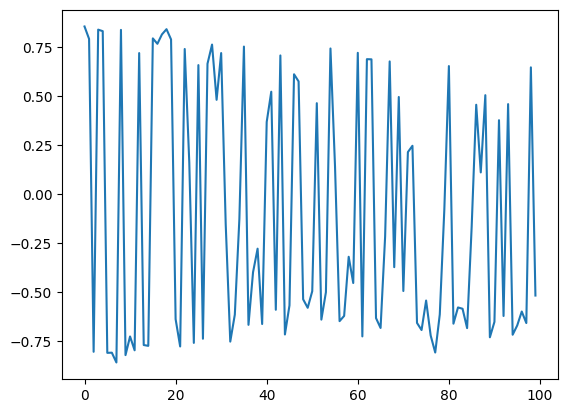

In [14]:
import matplotlib.pyplot as plt
aq_k = torch.Tensor([ 8.5356e-01,  7.9027e-01, -8.0386e-01,  8.3739e-01,  8.2972e-01,
         -8.0924e-01, -8.0844e-01, -8.5832e-01,  8.3624e-01, -8.2076e-01,
         -7.2585e-01, -7.9617e-01,  7.1806e-01, -7.6941e-01, -7.7362e-01,
          7.9285e-01,  7.6529e-01,  8.1320e-01,  8.3977e-01,  7.8753e-01,
         -6.3751e-01, -7.7672e-01,  7.3886e-01,  1.6160e-01, -7.5858e-01,
          6.5676e-01, -7.3741e-01,  6.6374e-01,  7.6126e-01,  4.7988e-01,
          7.1809e-01, -1.5484e-01, -7.5195e-01, -6.1453e-01, -1.2679e-01,
          7.5118e-01, -6.6657e-01, -3.9858e-01, -2.7854e-01, -6.6237e-01,
          3.6709e-01,  5.2118e-01, -5.8981e-01,  7.0595e-01, -7.1565e-01,
         -5.6748e-01,  6.1003e-01,  5.7373e-01, -5.3634e-01, -5.7976e-01,
         -4.9507e-01,  4.6273e-01, -6.3995e-01, -5.0033e-01,  7.4146e-01,
          1.3980e-01, -6.4774e-01, -6.2108e-01, -3.1977e-01, -4.5344e-01,
          7.1932e-01, -7.2548e-01,  6.8700e-01,  6.8615e-01, -6.3214e-01,
         -6.8255e-01, -2.1682e-01,  6.7553e-01, -3.7273e-01,  4.9435e-01,
         -4.9418e-01,  2.1365e-01,  2.4571e-01, -6.5677e-01, -6.9301e-01,
         -5.4278e-01, -7.2086e-01, -8.0767e-01, -6.1353e-01, -7.8428e-02,
          6.5183e-01, -6.6055e-01, -5.7796e-01, -5.8461e-01, -6.8320e-01,
         -1.6782e-01,  4.5478e-01,  1.1003e-01,  5.0357e-01, -7.2986e-01,
         -6.5150e-01,  3.7604e-01, -6.2144e-01,  4.5803e-01, -7.1699e-01,
         -6.6974e-01, -5.9875e-01, -6.5748e-01,  6.4529e-01, -5.1729e-01])
print('argmax=', torch.argmax(aq_k))
plt.plot(np.arange(100), aq_k)
# aq_k_softmax = torch.softmax(aq_k, dim=0)
# plt.plot(np.arange(100), aq_k_softmax)

# try see 1 batch in task0 perform differently after model trained with different tasks

- use 1 batch of test dataset, some samples in task0, and forward on model just finish task0, finish task1,... to see if logits changes (decrease peak or...) or prompt selection different (aq_k) ... 

In [1]:

import types
import yaml

import numpy as np
import torch
from torch.utils.data import DataLoader

from trainer import Trainer

args = types.SimpleNamespace()
args.config = 'configs/cgqa_prompt.yaml' 
args.gpuid = [0]
args.repeat = 1 
args.overwrite = 1 
args.learner_type = 'prompt' 
args.learner_name = 'CODAPromptR' 
args.prompt_param = [100, 8, 0.0]
args.memory = 1000 
args.log_dir = '../CODA-Prompt-experiments/CGQA/10-task/coda-p-r-4-1' 
args.debug_mode = 1
args.dataroot = '../../../OneDrive - City University of Hong Kong - Student/datasets'
args.oracle_flag = False
args.upper_bound_flag = False
args.temp = 2
args.DW = False
args.mode = 'continual'
args.test_model = -1

config = yaml.load(open(args.config, 'r'), Loader=yaml.Loader)
config.update(vars(args))

args = types.SimpleNamespace(**config)
args.batch_size = 10

metric_keys = ['acc','time',]
save_keys = ['global', 'pt', 'pt-local']
global_only = ['time']
avg_metrics = {}
for mkey in metric_keys: 
    avg_metrics[mkey] = {}
    for skey in save_keys: avg_metrics[mkey][skey] = []


In [2]:
"""要看看第二个task的samples，为什么最后掉到了11"""

trainer = Trainer(args, 0, metric_keys, save_keys)      # new trainer

# prepare model
for i in range(1): 
    trainer.current_t_index = i
    train_name = trainer.task_names[i]
    print('======================', train_name, '=======================')
    
    task = trainer.tasks_logits[i]
    trainer.add_dim = len(task)
    
    if i > 0: 
        trainer.learner.model.prompt.process_task_count()
    
    # load model
    model_save_dir = trainer.model_top_dir + '/models/repeat-'+str(trainer.seed+1)+'/task-'+trainer.task_names[i]+'/'
    trainer.learner.task_count = i 
    trainer.learner.add_valid_output_dim(len(trainer.tasks_logits[i]))
    trainer.learner.pre_steps()
    
trainer.learner.load_model(model_save_dir)  # load last model
trainer.learner.model.task_id = i       


i = i + 1

# print name
train_name = trainer.task_names[i]
print('======================', train_name, '=======================')

task = trainer.tasks_logits[i]
trainer.add_dim = len(task)
trainer.current_t_index = i
trainer.learner.model.task_id = i
trainer.learner.add_valid_output_dim(trainer.add_dim)
trainer.learner.model.prompt.process_task_count()

# trainer.train_dataset.load_dataset(i, train=False)          # load task0 and task1
trainer.train_dataset.load_dataset(1, train=True)
train_loader = DataLoader(trainer.train_dataset, batch_size=trainer.batch_size, shuffle=True, drop_last=True, num_workers=int(trainer.workers))

for x, y, task in train_loader:
    x = x.cuda()
    y = y.cuda()
    task = task.cuda()
    break

print(f'x.shape: {x.shape}, y: {y}, task: {task}')


*****************************************
====================== 1 =======================
Incremental class: Old valid output dimension: 0
Incremental class: New Valid output dimension: 10
=> Load Done
====================== 2 =======================
Incremental class: Old valid output dimension: 10
Incremental class: New Valid output dimension: 20
x.shape: torch.Size([10, 3, 224, 224]), y: tensor([11, 10, 17, 11, 13, 15, 16, 10, 19, 19], device='cuda:0'), task: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0')


In [3]:
trainer.learner.update_model(x, y, task)

train batch: 
targets:tensor([11, 10, 17, 11, 13, 15, 16, 10, 19, 19], device='cuda:0') 
tasks:tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0')
in CodaPromptR forward: task_id=tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0'); self.task_count=1.
mask: tensor([True, True, True, True, True, True, True, True, True, True],
       device='cuda:0')
aq_k: tensor([[-6.1323e-01,  5.4658e-01,  6.0642e-01, -5.9304e-01, -5.6575e-01,
         -6.2120e-01, -5.7845e-01,  5.7296e-01,  6.0182e-01, -6.2802e-01,
         -5.4839e-02, -3.9403e-02, -1.0208e-02,  7.7512e-03, -1.7670e-02,
          2.0160e-02,  2.6362e-02,  3.0365e-02,  4.2314e-02,  2.7613e-03],
        [-7.4543e-01,  7.5038e-01,  7.2096e-01, -7.4902e-01, -7.3064e-01,
         -7.4517e-01, -7.2121e-01,  7.1787e-01,  7.2245e-01, -7.4858e-01,
         -3.4248e-02, -3.2809e-02,  1.8134e-02, -6.7304e-03,  2.8671e-02,
          4.3877e-02,  3.7976e-02,  3.5836e-02,  5.1103e-02,  5.2174e-02],
        [-7.5013e-01,  7.0810e-01,  7.6978

AttributeError: 'CODAPromptR' object has no attribute 'dw_k'

In [4]:
print(i)
model_save_dir = trainer.model_top_dir + '/models/repeat-'+str(trainer.seed+1)+'/task-'+trainer.task_names[i]+'/'
trainer.learner.load_model(model_save_dir) 

trainer.learner.update_model(x, y, task)


1
=> Load Done
train batch: 
targets:tensor([11, 10, 17, 11, 13, 15, 16, 10, 19, 19], device='cuda:0') 
tasks:tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0')
in CodaPromptR forward: task_id=tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0'); self.task_count=1.
mask: tensor([True, True, True, True, True, True, True, True, True, True],
       device='cuda:0')
aq_k: tensor([[-0.6132,  0.5466,  0.6064, -0.5930, -0.5658, -0.6212, -0.5785,  0.5730,
          0.6018, -0.6280, -0.6006, -0.1891, -0.5855,  0.2916,  0.0750, -0.4309,
          0.6470, -0.6351,  0.5701, -0.6263],
        [-0.7454,  0.7504,  0.7210, -0.7490, -0.7306, -0.7452, -0.7212,  0.7179,
          0.7224, -0.7486, -0.6496, -0.5155, -0.7039,  0.2444,  0.0789, -0.4404,
          0.5556, -0.7272,  0.5068, -0.5368],
        [-0.7501,  0.7081,  0.7698, -0.7482, -0.7361, -0.7786, -0.7338,  0.7404,
          0.7383, -0.7413, -0.7971, -0.4505, -0.8318,  0.3785, -0.1867, -0.4081,
          0.8061, -0.6975,  0.6122, -0.6441

AttributeError: 'CODAPromptR' object has no attribute 'dw_k'

In [5]:

# prepare model
for i in range(2, 10): 
    trainer.current_t_index = i
    train_name = trainer.task_names[i]
    print('======================', train_name, '=======================')
    
    task = trainer.tasks_logits[i]
    trainer.add_dim = len(task)
    
    if i > 0: 
        trainer.learner.model.prompt.process_task_count()
    
    # load model
    model_save_dir = trainer.model_top_dir + '/models/repeat-'+str(trainer.seed+1)+'/task-'+trainer.task_names[i]+'/'
    trainer.learner.task_count = i 
    trainer.learner.add_valid_output_dim(len(trainer.tasks_logits[i]))
    trainer.learner.pre_steps()

print(i)
trainer.learner.load_model(model_save_dir)  # load last model
trainer.learner.model.task_id = i       

====================== 3 =======================
Incremental class: Old valid output dimension: 20
Incremental class: New Valid output dimension: 30
====================== 4 =======================
Incremental class: Old valid output dimension: 30
Incremental class: New Valid output dimension: 40
====================== 5 =======================
Incremental class: Old valid output dimension: 40
Incremental class: New Valid output dimension: 50
====================== 6 =======================
Incremental class: Old valid output dimension: 50
Incremental class: New Valid output dimension: 60
====================== 7 =======================
Incremental class: Old valid output dimension: 60
Incremental class: New Valid output dimension: 70
====================== 8 =======================
Incremental class: Old valid output dimension: 70
Incremental class: New Valid output dimension: 80
====================== 9 =======================
Incremental class: Old valid output dimension: 80
Increme

In [10]:
task = torch.Tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]).cuda()

trainer.learner.update_model(x, y, task)

train batch: 
targets:tensor([11, 10, 17, 11, 13, 15, 16, 10, 19, 19], device='cuda:0') 
tasks:tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], device='cuda:0')
in CodaPromptR forward: task_id=tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], device='cuda:0'); self.task_count=9.
mask: tensor([True, True, True, True, True, True, True, True, True, True],
       device='cuda:0')
aq_k: tensor([[-0.6132,  0.5466,  0.6064, -0.5930, -0.5658, -0.6212, -0.5785,  0.5730,
          0.6018, -0.6280, -0.6006, -0.1891, -0.5855,  0.2916,  0.0750, -0.4309,
          0.6470, -0.6351,  0.5701, -0.6263],
        [-0.7454,  0.7504,  0.7210, -0.7490, -0.7306, -0.7452, -0.7212,  0.7179,
          0.7224, -0.7486, -0.6496, -0.5155, -0.7039,  0.2444,  0.0789, -0.4404,
          0.5556, -0.7272,  0.5068, -0.5368],
        [-0.7501,  0.7081,  0.7698, -0.7482, -0.7361, -0.7786, -0.7338,  0.7404,
          0.7383, -0.7413, -0.7971, -0.4505, -0.8318,  0.3785, -0.1867, -0.4081,
          0.8061, -0.6975,  0.6122, -0

TypeError: only integer tensors of a single element can be converted to an index

In [ ]:

'''要看看第6个task的samples，刚训练完的acc很低，最后一个task训练完却上升了'''
trainer.train_dataset.load_dataset(5, train=True)


old sample，aq_k的前面几个维度应该是没变的，看看forward的时候，（train是True和False）的aq_k的不同

# prompt mask for different tasks

In [1]:

import types
import yaml

import numpy as np
import torch
from torch.utils.data import DataLoader

from trainer import Trainer

args = types.SimpleNamespace()
args.config = 'configs/cgqa_prompt.yaml' 
args.gpuid = [0]
args.repeat = 1 
args.overwrite = 1 
args.learner_type = 'prompt' 
args.learner_name = 'CODAPromptR' 
args.prompt_param = [100, 8, 0.0]
args.memory = 1000 
args.log_dir = '../CODA-Prompt-experiments/CGQA/10-task/coda-p-r-2_' 
args.debug_mode = 1
args.dataroot = '../../../OneDrive - City University of Hong Kong - Student/datasets'
args.oracle_flag = False
args.upper_bound_flag = False
args.temp = 2
args.DW = False
args.mode = 'continual'
args.test_model = -1

config = yaml.load(open(args.config, 'r'), Loader=yaml.Loader)
config.update(vars(args))

args = types.SimpleNamespace(**config)
args.batch_size = 10

metric_keys = ['acc','time',]
save_keys = ['global', 'pt', 'pt-local']
global_only = ['time']
avg_metrics = {}
for mkey in metric_keys: 
    avg_metrics[mkey] = {}
    for skey in save_keys: avg_metrics[mkey][skey] = []


In [2]:

trainer = Trainer(args, 0, metric_keys, save_keys)      # new trainer
for i in range(1):      # load the model untrained with the last task
    trainer.current_t_index = i
    train_name = trainer.task_names[i]
    print('======================', train_name, '=======================')
    
    task = trainer.tasks_logits[i]
    trainer.add_dim = len(task)
    
    if i > 0: 
        trainer.learner.model.prompt.process_task_count()
    
    # load model
    model_save_dir = trainer.model_top_dir + '/models/repeat-'+str(trainer.seed+1)+'/task-'+trainer.task_names[i]+'/'
    trainer.learner.task_count = i 
    trainer.learner.add_valid_output_dim(len(trainer.tasks_logits[i]))
    trainer.learner.pre_steps()
    
trainer.learner.load_model(model_save_dir)  # load last model
trainer.learner.model.task_id = i       # 8


# train on last task
i = i + 1

# print name
train_name = trainer.task_names[i]
print('======================', train_name, '=======================')

task = trainer.tasks_logits[i]
trainer.train_dataset.load_dataset(i, train=False)          # load task0 and task1
trainer.add_dim = len(task)
trainer.current_t_index = i
trainer.learner.model.task_id = i
trainer.learner.add_valid_output_dim(trainer.add_dim)

train_loader = DataLoader(trainer.train_dataset, batch_size=trainer.batch_size, shuffle=True, drop_last=True, num_workers=int(trainer.workers))

trainer.learner.model.prompt.process_task_count()


*****************************************
====================== 1 =======================
Incremental class: Old valid output dimension: 0
Incremental class: New Valid output dimension: 10
=> Load Done
====================== 2 =======================
Incremental class: Old valid output dimension: 10
Incremental class: New Valid output dimension: 20


In [3]:

trainer.learner.overwrite = True
avg_train_time = trainer.learner.learn_batch(train_loader, trainer.train_dataset, model_save_dir, None)

Optimizer is reset!
*****************************************
LR: 0.001
train batch: 
targets:tensor([ 9,  2, 15, 14, 16,  3, 14, 19,  0,  1], device='cuda:0') 
tasks:tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0')
in CodaPromptR forward: task_id=1; self.batch_task_ids=tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0').
mask: tensor([True, True, True, True, True, True, True, True, True, True],
       device='cuda:0')
P_ shape: torch.Size([10, 8, 768])
in CodaPromptR forward: task_id=1; self.batch_task_ids=tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0').
mask: tensor([True, True, True, True, True, True, True, True, True, True],
       device='cuda:0')
P_ shape: torch.Size([10, 8, 768])
in CodaPromptR forward: task_id=1; self.batch_task_ids=tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0').
mask: tensor([True, True, True, True, True, True, True, True, True, True],
       device='cuda:0')
P_ shape: torch.Size([10, 8, 768])
in CodaPromptR forward: task_id=1; self

KeyboardInterrupt: 

In [8]:
import torch.nn as nn

In [17]:


B= 10
x_querry = torch.ones((B, 768), device='cuda', requires_grad=True)
x_querry_ = x_querry

batch_task_ids = torch.from_numpy(np.array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1])).cuda()
unique_task_ids = torch.unique(batch_task_ids)

E_breaker = int(8 / 2)  # 8 / 2
K_ = torch.ones([100, 768], device='cuda', requires_grad=True)
A_ = torch.ones([100, 768], device='cuda', requires_grad=True)
p_ = torch.ones([100, 8, 768], device='cuda', requires_grad=True)

pt = int(100 / 10)  # 100/10=10
P_ = torch.ones([B, *p_.shape[1:]]).to(p_.device)         # [bs, 8, 768]

print('P_.requires_grad:', P_.requires_grad )

print(unique_task_ids)
# print(unique_task_ids_index)

task_count = 1      # 第2个tasks
train = True

loss = 0

num_samples = 0
for task in unique_task_ids:
    mask = batch_task_ids == task

    print(f'mask: {mask}')

    x_querry = x_querry_[mask]      # mask input
    num_samples_ = len(x_querry)
    num_samples += num_samples_

    if train:
        s = int(task * pt)
        f = int((task + 1) * pt)
        if task < task_count:  # old task
            K = K_[0:f].detach().clone()
            A = A_[0:f].detach().clone()
            p = p_[0:f].detach().clone()
        else:           # new task
            if task_count > 0:     # not first task
                K = torch.cat((K_[:s].detach().clone(),K_[s:f]), dim=0)
                A = torch.cat((A_[:s].detach().clone(),A_[s:f]), dim=0)
                p = torch.cat((p_[:s].detach().clone(),p_[s:f]), dim=0)
            else:           # first task
                K = K_[s:f]
                A = A_[s:f]
                p = p_[s:f]
    else:   # for inference, we do not know taskid for samples, so use task_count
        f = int((task_count + 1) * pt)
        # select all involved prompts
        K = K_[0:f]
        A = A_[0:f]
        p = p_[0:f]

    # b = bs, d = 768, k = 100, l=8
    # with attention and cosine sim
    # (b x 1 x d) * soft([1 x k x d]) = (b x k x d) -> attention = k x d
    a_querry = torch.einsum('bd,kd->bkd', x_querry, A)
    # # (b x k x d) - [1 x k x d] = (b x k) -> key = k x d
    n_K = nn.functional.normalize(K, dim=1)
    q = nn.functional.normalize(a_querry, dim=2)
    aq_k = torch.einsum('bkd,kd->bk', q, n_K)  # aq_k is alpha (cosine similarity) [bs, 100]
    # (b x 1 x k x 1) * [1 x plen x k x d] = (b x plen x d) -> prompt = plen x k x d
    P__ = torch.einsum('bk,kld->bld', aq_k, p)

    # debug
    print(f'P__ shape: {P__.shape}')      # [bs, 8, 768]

    # move P__ to P_
    P_[mask] = P__
    
    print('P_.requires_grad:', P_.requires_grad )
    
    def ortho_penalty(t):
        return ((t @t.T - torch.eye(t.shape[0]).cuda())**2).mean()

    loss += ortho_penalty(K) * 1 * num_samples_
    loss += ortho_penalty(A) * 1 * num_samples_
    loss += ortho_penalty(p.view(p.shape[0], -1)) * 1 * num_samples_

loss /= num_samples
# 看看P_赋值进去后，require_grad对不对

print('loss:', loss)
    

P_.requires_grad: False
tensor([0, 1], device='cuda:0')
mask: tensor([ True, False, False,  True, False,  True, False, False, False, False],
       device='cuda:0')
P__ shape: torch.Size([3, 8, 768])
P_.requires_grad: True
mask: tensor([False,  True,  True, False,  True, False,  True,  True,  True,  True],
       device='cuda:0')
P__ shape: torch.Size([7, 8, 768])
P_.requires_grad: True
loss: tensor(38927388., device='cuda:0', grad_fn=<DivBackward0>)


tensor(589747.2500, device='cuda:0', grad_fn=<MeanBackward0>)

# setup args

In [1]:
import types
import yaml

import numpy as np
import torch
from torch.utils.data import DataLoader

from trainer import Trainer

args = types.SimpleNamespace()
args.config = 'configs/cgqa_prompt.yaml' 
args.gpuid = [0]
args.repeat = 1 
args.overwrite = 1 
args.learner_type = 'prompt' 
args.learner_name = 'CODAPromptR' 
args.prompt_param = [100, 8, 0.0]
args.memory = 1000 
args.log_dir = '../CODA-Prompt-experiments/CGQA/10-task/coda-p-r-2_' 
args.debug_mode = 1
args.dataroot = '../../../OneDrive - City University of Hong Kong - Student/datasets'
args.oracle_flag = False
args.upper_bound_flag = False
args.temp = 2
args.DW = False
args.mode = 'continual'
args.test_model = -1

config = yaml.load(open(args.config, 'r'), Loader=yaml.Loader)
config.update(vars(args))

args = types.SimpleNamespace(**config)
args.batch_size = 10

metric_keys = ['acc','time',]
save_keys = ['global', 'pt', 'pt-local']
global_only = ['time']
avg_metrics = {}
for mkey in metric_keys: 
    avg_metrics[mkey] = {}
    for skey in save_keys: avg_metrics[mkey][skey] = []


## investigate evaluation 

In [2]:

trainer = Trainer(args, 0, metric_keys, save_keys)      # new trainer
for i in range(10): 
    if i > 0: 
        trainer.learner.model.prompt.process_task_count()
    
    # load model
    model_save_dir = trainer.model_top_dir + '/models/repeat-'+str(trainer.seed+1)+'/task-'+trainer.task_names[i]+'/'
    trainer.learner.task_count = i 
    trainer.learner.add_valid_output_dim(len(trainer.tasks_logits[i]))
    trainer.learner.pre_steps()
    
trainer.learner.load_model(model_save_dir)  # load last model
trainer.learner.model.task_id = i 

*****************************************
Incremental class: Old valid output dimension: 0
Incremental class: New Valid output dimension: 10
Incremental class: Old valid output dimension: 10
Incremental class: New Valid output dimension: 20
Incremental class: Old valid output dimension: 20
Incremental class: New Valid output dimension: 30
Incremental class: Old valid output dimension: 30
Incremental class: New Valid output dimension: 40
Incremental class: Old valid output dimension: 40
Incremental class: New Valid output dimension: 50
Incremental class: Old valid output dimension: 50
Incremental class: New Valid output dimension: 60
Incremental class: Old valid output dimension: 60
Incremental class: New Valid output dimension: 70
Incremental class: Old valid output dimension: 70
Incremental class: New Valid output dimension: 80
Incremental class: Old valid output dimension: 80
Incremental class: New Valid output dimension: 90
Incremental class: Old valid output dimension: 90
Increment

In [3]:
trainer.task_eval(9)

validation split name: 10
batch0: 
target:tensor([90, 90, 90, 90, 90, 90, 90, 90, 90, 90]) 
task:tensor([9, 9, 9, 9, 9, 9, 9, 9, 9, 9])
batch0: 
output:tensor([[-3.3142e+01,  2.8046e+01, -1.9962e+01, -2.1735e+01,  7.8642e+00,
         -8.3472e+00, -8.9648e+00,  5.5057e-01,  6.5969e+00, -6.2857e+00,
         -1.6382e+01, -2.2210e+00,  1.8063e+01, -1.8810e+01,  2.5544e+01,
         -1.3648e+01, -2.8160e+01,  1.9250e+00, -1.7808e+01,  6.7436e+00,
         -1.1854e+01,  1.5023e+01,  8.2802e+00,  3.2852e+00, -1.3382e+01,
         -2.9735e+01, -2.0632e+01,  2.6417e+01,  4.0816e+01, -1.6765e+01,
         -3.3500e+01, -1.5986e+01,  7.3160e+00, -8.2866e+00, -8.9015e+00,
         -1.8135e+01, -2.5174e+01, -2.7716e+00,  1.0817e+01,  2.8281e+01,
         -3.4800e+00,  9.2889e+00,  6.3080e+00, -1.2784e+01,  2.9321e+00,
          8.8897e+00, -2.3232e+01, -8.7584e+00, -2.1862e+01,  1.0101e+01,
          1.7392e+01,  1.1195e+01, -1.5349e+01, -1.9439e+01, -6.1406e+00,
          6.9273e+00, -5.9576e+00,

Traceback (most recent call last):
  File "/home/liaoweiduo/anaconda3/envs/coda/lib/python3.8/multiprocessing/queues.py", line 245, in _feed
    send_bytes(obj)
  File "/home/liaoweiduo/anaconda3/envs/coda/lib/python3.8/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/home/liaoweiduo/anaconda3/envs/coda/lib/python3.8/multiprocessing/connection.py", line 411, in _send_bytes
    self._send(header + buf)
  File "/home/liaoweiduo/anaconda3/envs/coda/lib/python3.8/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
Traceback (most recent call last):
  File "/home/liaoweiduo/anaconda3/envs/coda/lib/python3.8/multiprocessing/queues.py", line 245, in _feed
    send_bytes(obj)
  File "/home/liaoweiduo/anaconda3/envs/coda/lib/python3.8/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/home/liaoweiduo/ana

KeyboardInterrupt: 

In [11]:

logits = torch.Tensor([[-2.5609e+01,  3.9362e+01, -2.6701e+01, -4.6114e+01,  5.1961e+00,
         -1.8873e+01, -1.5155e+00, -2.1092e+01, -1.7141e+01, -1.7860e+00,
         -2.2204e+01, -1.9776e+01,  1.3078e+01, -3.1301e+01,  3.7426e+01,
         -3.2687e+01, -3.4169e+01, -1.5261e+01, -1.7143e+01, -2.9586e+00,
         -1.7260e+01,  2.5463e+01,  2.6821e+00, -8.8080e+00, -1.1778e+01,
         -1.5086e+01, -1.7631e+01,  2.8911e+01,  3.4742e+01, -2.4681e+01,
         -1.8926e+01, -1.7614e+01,  5.3791e+00, -9.5301e+00,  2.5209e+00,
         -2.5648e+01, -1.4143e+01,  1.5702e+01, -2.2287e+00,  1.5522e+01,
         -3.3870e+00, -4.1445e+00, -1.4553e+01, -1.7157e+01, -3.0178e+00,
         -8.1731e+00, -1.4762e+01, -1.0682e+01, -9.3281e+00,  1.7127e+01,
          1.5169e+01,  4.5438e+00, -1.1983e+01, -1.8772e+01, -1.4682e+01,
          9.8637e+00, -1.4683e+01, -1.8314e+01,  7.8018e+00, -1.1550e+01,
         -2.1849e+01, -1.8278e+01,  2.5654e+00, -1.8619e+01,  1.1197e+01,
         -2.5617e+01,  1.9754e+00, -1.5006e+01, -1.8249e+01,  5.8400e+00,
         -5.4871e+00, -4.2252e+00, -7.1260e+00,  2.8443e+00,  2.7752e+01,
         -5.9766e+00, -1.5279e+01, -4.8668e-01, -1.1347e+01,  1.0470e+00,
         -9.6435e-01, -1.1275e+01, -3.9237e+00, -1.2546e+01,  8.2804e+00,
          1.4515e+01,  1.2718e+00, -1.1825e+01,  1.5398e+01, -1.4557e+01,
          2.8517e+01, -1.1883e+01, -4.0266e+00, -2.1214e+00, -2.8983e-01,
         -1.0082e+01, -1.2018e+01,  8.9598e-01, -3.7260e+00,  2.1951e+00]])
print(torch.softmax(logits[:, -10:], dim=1))
print(torch.argmax(torch.softmax(logits[:, -10:], dim=1)))

tensor([[1.0000e+00, 2.8478e-18, 7.3535e-15, 4.9421e-14, 3.0857e-13, 1.7245e-17,
         2.4881e-18, 1.0101e-12, 9.9321e-15, 3.7029e-12]])
tensor(0)


## investigate training 

In [2]:

trainer = Trainer(args, 0, metric_keys, save_keys)      # new trainer
for i in range(8):      # load the model untrained with the last task
    trainer.current_t_index = i
    train_name = trainer.task_names[i]
    print('======================', train_name, '=======================')
    
    task = trainer.tasks_logits[i]
    trainer.train_dataset.load_dataset(i, train=True)
    trainer.add_dim = len(task)
    
    if i > 0: 
        trainer.learner.model.prompt.process_task_count()
    
    # load model
    model_save_dir = trainer.model_top_dir + '/models/repeat-'+str(trainer.seed+1)+'/task-'+trainer.task_names[i]+'/'
    trainer.learner.task_count = i 
    trainer.learner.add_valid_output_dim(len(trainer.tasks_logits[i]))
    trainer.learner.pre_steps()
    
    
    trainer.train_dataset.update_coreset(2000, np.arange(trainer.learner.last_valid_out_dim))
    
trainer.learner.load_model(model_save_dir)  # load last model
trainer.learner.model.task_id = i       # 8

*****************************************
====================== 1 =======================
Incremental class: Old valid output dimension: 0
Incremental class: New Valid output dimension: 10
Update coreset for task 0.


KeyboardInterrupt: 

In [10]:
len(trainer.train_dataset.pool.clusters)

3

In [ ]:


# train on last task
i = i + 1

# print name
train_name = trainer.task_names[i]
print('======================', train_name, '=======================')

task = trainer.tasks_logits[i]
trainer.train_dataset.load_dataset(i, train=True)
trainer.add_dim = len(task)
trainer.current_t_index = i
trainer.learner.model.task_id = i
trainer.learner.add_valid_output_dim(trainer.add_dim)

trainer.train_dataset.append_coreset(only=False)
train_loader = DataLoader(trainer.train_dataset, batch_size=trainer.batch_size, shuffle=True, drop_last=True, num_workers=int(trainer.workers))

trainer.learner.model.prompt.process_task_count()


In [24]:
trainer.train_dataset[10009][1]

26

In [31]:
for i, (x, y, tasks) in enumerate(train_loader):
    x = x.cuda()
    y = y.cuda()
    print(f'train batch: \ntargets:{y} \ntasks:{tasks}')
    
    logits, prompt_loss = trainer.learner.model(x, train=True)
    
    print(f'logits: {logits}')
    
    # ce with heuristic
    # logits[:,:self.last_valid_out_dim] = -float('inf')
    task_dim_list = trainer.learner.task_dim_list     # [[0,1,2,...,9],[10,11,...,19],...]
    mask = torch.ones_like(logits, dtype=torch.bool)
    filter_indices = torch.tensor(
        [[idx, value] for idx, task in enumerate(tasks) for value in task_dim_list[task]],
        device=logits.device
    )
    mask[filter_indices[:, 0], filter_indices[:, 1]] = False    # valid region to 0, thus masked_fill all 1 to -inf
    # mask = torch.BoolTensor(mask).to(logits.device)
    logits = logits.masked_fill(mask, value=-float('inf'))
    
    print(f'masked logits: {logits}')
    
    break


train batch: 
targets:tensor([32,  6, 36, 15, 34, 30, 31, 27, 18, 34], device='cuda:0') 
tasks:tensor([3, 0, 3, 1, 3, 3, 3, 2, 1, 3])
logits: tensor([[-7.3875e+00,  1.3184e+01, -7.4161e+00, -1.6622e+01, -8.2968e+00,
          2.2984e+00, -5.0082e-01,  1.3571e+01,  3.0310e+00, -2.6136e+00,
          6.6132e+00,  2.3697e+00,  1.2915e+01, -6.7975e+00,  2.6406e+00,
         -1.4406e+01, -2.5122e+00,  9.5376e+00, -1.1651e+01,  1.0564e+01,
         -8.6060e+00,  9.8102e+00,  2.3839e-01,  5.3212e+00,  7.5290e+00,
         -3.8517e+00,  1.6964e-02, -5.1670e+00, -5.2764e+00, -5.6437e+00,
          9.1013e-01,  2.9320e+00,  3.3698e+00,  3.6268e+00,  3.0876e-01,
         -3.1611e-01, -3.8614e-01, -2.0294e+00, -2.5773e+00, -5.1407e-01,
         -1.2680e-01, -1.8360e+00,  6.4645e-02,  5.4490e+00,  1.5226e+00,
         -5.5004e-03,  2.6300e-01,  2.5126e+00,  2.1676e+00, -2.3192e+00,
         -2.0160e+00,  1.2626e+00,  1.1992e+00,  6.1153e-01,  1.8490e+00,
          1.4878e+00, -4.2909e-01, -3.0107e+

In [37]:
logits[0]

tensor([   -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,
           -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,
           -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,
           -inf,    -inf,    -inf,    -inf,    -inf,    -inf,  0.9101,  2.9320,
         3.3698,  3.6268,  0.3088, -0.3161, -0.3861, -2.0294, -2.5773, -0.5141,
           -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,
           -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,
           -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,
           -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,
           -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,
           -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,
           -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,
           -inf,    -inf,    -inf,    -i

In [38]:
torch.nn.CrossEntropyLoss()(logits[0:1][:40], y[0:1])

tensor(1.1464, device='cuda:0', grad_fn=<NllLossBackward0>)

# Try controlling logit mask for each task

In [42]:
import torch
import numpy as np

task_dim_list = [[0,1], [2, 3], [4, 5]]
logits = torch.Tensor([[0.1, 0.1, 0.1, 0.1, 0.1, 0.5], 
                       [0.1, 0.1, 0.1, 0.7, -float('inf'), -float('inf')], 
                       [0.1, 0.1, 0.6, 0.2, -float('inf'), -float('inf')]]).cuda()
logits.requires_grad = True
logits = logits + 0.01

tasks = np.array([2,1,1])

mask = np.ones(logits.shape)        # valid region to 0, thus masked_fill to -inf

idx_value_pair = np.array([[idx, value] for idx, task in enumerate(tasks) for value in task_dim_list[task]])

mask[idx_value_pair[:, 0], idx_value_pair[:, 1]] = 0 
mask_tensor = torch.BoolTensor(mask).to(logits.device)

logits_masked = logits.masked_fill(mask_tensor, value=-float('inf'))
print(logits_masked)

tensor([[  -inf,   -inf,   -inf,   -inf, 0.1100, 0.5100],
        [  -inf,   -inf, 0.1100, 0.7100,   -inf,   -inf],
        [  -inf,   -inf, 0.6100, 0.2100,   -inf,   -inf]], device='cuda:0',
       grad_fn=<MaskedFillBackward0>)


In [41]:
logits_masked[0, 0] = 0.1
logits_masked[0, 0]

tensor(0.1000, device='cuda:0', grad_fn=<SelectBackward0>)

# Pool behavior

In [1]:
import os
import numpy as np
import torch
import copy

from dataloaders.cfst_dataset import CGQA
from learners.pmo_utils import Pool

# load val dataset since it is the smallest, but dataset.train is True to let it cat Pool
dataset = CGQA("../../../OneDrive - City University of Hong Kong - Student/datasets", train=False, seed=0, validation=True, pre_loaded=False)
dataset.train = True

pool = dataset.pool
dataset_backup = copy.deepcopy(dataset)

In [2]:
# print(dataset.target_datasets[0].__class__.__name__)

dataset.load_dataset(0, True)
dataset.update_coreset(400, None)
dataset.load_dataset(1, True)
dataset.update_coreset(400, None)

Update coreset for task 0.
Update coreset for task 1.


In [3]:
# print(dataset.benchmark.label_info[2])
print(f"original classes for task 0: {dataset.benchmark.original_classes_in_exp[0]}")
print(f"original classes for task 0: {[dataset.benchmark.label_info[2][target] for target in dataset.benchmark.original_classes_in_exp[0]]}")

pool.clusters[0][0]['images'].shape

print(f"original classes for task 1: {dataset.benchmark.original_classes_in_exp[1]}")
print(f"original classes for task 1: {[dataset.benchmark.label_info[2][target] for target in dataset.benchmark.original_classes_in_exp[1]]}")

pool.clusters[1][0]['images'].shape     # bug

original classes for task 0: [26 86  2 55 75 93 16 73 54 95]
original classes for task 0: [('car', 'sign'), ('pants', 'shirt'), ('bench', 'door'), ('grass', 'leaves'), ('helmet', 'shorts'), ('plate', 'wall'), ('building', 'jacket'), ('helmet', 'shirt'), ('grass', 'jacket'), ('pole', 'table')]
original classes for task 1: [53 92 78 13  7 30 22 24 33  8]
original classes for task 1: [('flower', 'wall'), ('plate', 'sign'), ('jacket', 'shirt'), ('building', 'chair'), ('bench', 'pants'), ('chair', 'pole'), ('car', 'leaves'), ('car', 'shirt'), ('chair', 'sign'), ('bench', 'shirt')]


(20, 3, 224, 224)

In [4]:
dataset.target_datasets[dataset.t]._task_labels[0]  # return_task_id = False, task_labels not work

0

(3, 2240, 2912) -2.1179039478302 2.640000104904175
(3, 2240, 2912) -2.1179039478302 2.640000104904175
(3, 2240, 2912) -2.1179039478302 2.640000104904175


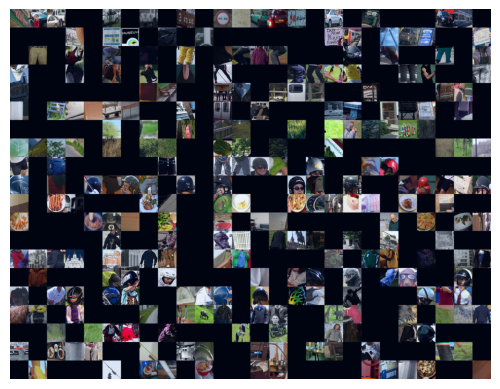

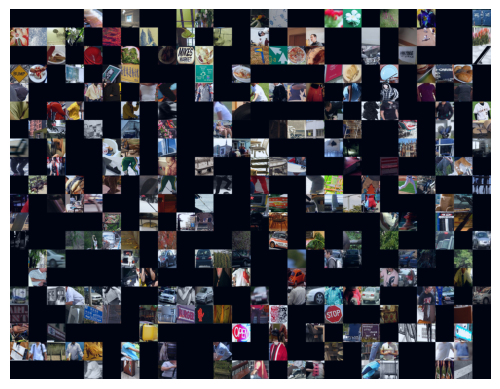

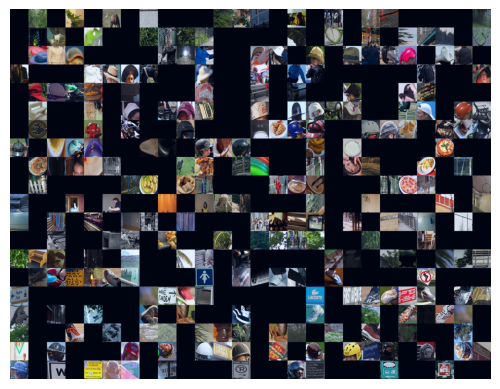

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

images = pool.current_images(True)
for cluster_id in range(len(images)):
    print(images[cluster_id].shape, np.min(images[cluster_id]), np.max(images[cluster_id]))
    
    mini = np.min(images[cluster_id])
    maxi = np.max(images[cluster_id])
    image = np.transpose(images[cluster_id], (1,2,0))
    
    fig, ax = plt.subplots()
    ax.imshow((image - mini)/(maxi - mini))
    ax.axis('off')
    
    fig.savefig(f'/mnt/d/Downloads/img{cluster_id}.png', bbox_inches = 'tight', dpi=300)

In [18]:
dataset.load_dataset(3, True)
print(len(dataset.dataset))
targets = [sample[1] for sample in dataset]
print(len(targets), np.min(targets), np.max(targets))

dataset.append_coreset()

print(len(dataset.dataset))
targets = [sample[1] for sample in dataset]
print(len(targets), np.min(targets), np.max(targets))

tasks = [sample[2] for sample in dataset]
print(len(tasks), np.min(tasks), np.max(tasks))

500
500 30 39
1000
1000 0 39
1000 0 3


In [19]:
print(np.array(tasks))
print(tasks[504])
print(targets[504])

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 

In [14]:

dataset.load_dataset(2, True)
dataset.update_coreset(400, None)

Update coreset for task 2.
